### Notebook 02: Preprocessing

In this notebook, the EA ModelSet metadata is transformed so that the features can be used machine learning models.

In [1]:
# Librairies
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to EA model set directory
ea_modelset_dir = os.path.join("..", "Data", "ea_modelset", "eamodelset", "dataset")

# Path to EA model set JSON file
ea_modelset_file = os.path.join(ea_modelset_dir, "dataset.json")

# Load EA model set JSON data
with open(ea_modelset_file, "r") as file:
    ea_modelset_data = json.load(file)

# Extract models information
models_info = ea_modelset_data.get("modelInfos", [])

# Convert models information to DataFrame
models_df = pd.DataFrame(models_info)

# Display first few rows of the DataFrame
models_df.head()

,id,name,source,repository,license,language,formats,tags,duplicateCount,elementCount,relationshipCount,viewCount
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,GitHub,,,fr,"[XML, CSV, JSON, ARCHIMATE]",[],0,142,296,24
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,GitHub,gattardm/P8,Unspecified,fr,"[ARCHIMATE, XML, CSV, JSON]",[],0,22,28,1
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,GenMyModel,,,ru,"[XML, CSV, JSON, ARCHIMATE]",[],0,55,41,3
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,GenMyModel,,,en,"[XML, JSON]",[],0,15,11,1
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,GenMyModel,,,en,"[XML, CSV, JSON, ARCHIMATE]",[],0,18,20,1


In [3]:
print(f"Value counts for column 'formats':")
print(models_df['formats'].value_counts())

Value counts for column 'formats':
formats
[XML, CSV, JSON, ARCHIMATE]    865
[ARCHIMATE, XML, CSV, JSON]     92
[XML, JSON]                     17
[JSON, ARCHIMATE]                2
[ARCHIMATE, CSV, JSON, XML]      1
[JSON, ARCHIMATE, XML, CSV]      1
Name: count, dtype: int64


In [4]:
# Create new feature for number of formats
models_df['num_formats'] = models_df['formats'].apply(lambda x: len(x) if isinstance(x, list) else 0)

A new feature 'num_formats' added to the DataFrame to represent the number of formats supported by each model. This is a useful numerical feature for analysis because it can be an indicator of maturity. 

In [5]:
print(f"Value counts for column 'tags':")
print(models_df['tags'].value_counts())


Value counts for column 'tags':
tags
[]                      782
[DUPLICATE]             142
[WARNING]                47
[DUPLICATE, WARNING]      7
Name: count, dtype: int64


In [6]:
# Create separate new features for warning and duplicate tags
models_df['hasWarning'] = models_df['tags'].apply(lambda x: 1 if isinstance(x, list) and 'WARNING' in x else 0)
models_df['hasDuplicate'] = models_df['tags'].apply(lambda x: 1 if isinstance(x, list) and 'DUPLICATE' in x else 0)


#### New features were created for warning and duplicate flags, which can both indicate higher risk. 

In [7]:
# Create a ratio between relationshipCount and elementCount to capture model complexity
models_df['rel_elem_ratio'] = models_df.apply(
    lambda row: row['relationshipCount'] / row['elementCount'] if row['elementCount'] > 0 else 0, axis=1
)

In [8]:
# Create a ratio between viewCount and elementCount to capture model visibility
models_df['view_elem_ratio'] = models_df.apply(
    lambda row: row['viewCount'] / row['elementCount'] if row['elementCount'] > 0 else 0, axis=1
)

Ratios created: 'rel_elem_ratio' and 'view_elem_ratio' to capture model complexity and visibility respectively.

In [9]:
# List columns in models_df
models_df.columns.tolist()


['id',
 'name',
 'source',
 'repository',
 'license',
 'language',
 'formats',
 'tags',
 'duplicateCount',
 'elementCount',
 'relationshipCount',
 'viewCount',
 'num_formats',
 'hasWarning',
 'hasDuplicate',
 'rel_elem_ratio',
 'view_elem_ratio']

In [10]:
# Drop unneeded columns
columns_to_drop = ['repository', 'license', 'formats', 'tags']
models_df = models_df.drop(columns=columns_to_drop)

# Display first few rows of the updated DataFrame
models_df.head()


,id,name,source,language,duplicateCount,elementCount,relationshipCount,viewCount,num_formats,hasWarning,hasDuplicate,rel_elem_ratio,view_elem_ratio
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,GitHub,fr,0,142,296,24,4,0,0,2.084507,0.169014
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,GitHub,fr,0,22,28,1,4,0,0,1.272727,0.045455
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,GenMyModel,ru,0,55,41,3,4,0,0,0.745455,0.054545
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,GenMyModel,en,0,15,11,1,2,0,0,0.733333,0.066667
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,GenMyModel,en,0,18,20,1,4,0,0,1.111111,0.055556


#### Unnecessary features were dropped from the DataFrame to streamline the dataset for analysis and modeling.

In [11]:
# Print value counts for new columns
new_columns = ["hasWarning", "hasDuplicate", "rel_elem_ratio", "view_elem_ratio"]
for col in new_columns:
    print(f"Value counts for column '{col}':")
    print(models_df[col].value_counts())
    print("\n")

Value counts for column 'hasWarning':
hasWarning
0    924
1     54
Name: count, dtype: int64


Value counts for column 'hasDuplicate':
hasDuplicate
0    829
1    149
Name: count, dtype: int64


Value counts for column 'rel_elem_ratio':
rel_elem_ratio
1.000000    30
1.500000    12
1.062500     9
0.000000     9
0.800000     7
            ..
1.387097     1
0.797872     1
1.693548     1
0.910000     1
1.078818     1
Name: count, Length: 684, dtype: int64


Value counts for column 'view_elem_ratio':
view_elem_ratio
0.062500    29
0.066667    27
0.055556    26
0.071429    22
0.058824    21
            ..
0.124138     1
0.005917     1
0.054878     1
0.434783     1
0.086705     1
Name: count, Length: 409, dtype: int64




In [12]:
# One hot encoding for categorical variables source and language
categorical_columns = ["source", "language"]
for col in categorical_columns:
    one_hot = pd.get_dummies(models_df[col], prefix=col, drop_first=True)
    models_df = pd.concat([models_df, one_hot], axis=1)
    models_df = models_df.drop(columns=[col])


#### Categorical columns 'source' and 'language' were one-hot encoded to convert them into a numerical format suitable for machine learning models.  

In [13]:
# Display first few rows of the updated DataFrame
models_df.head()

,id,name,duplicateCount,elementCount,relationshipCount,viewCount,num_formats,hasWarning,hasDuplicate,rel_elem_ratio,...,language_nn,language_pl,language_pt,language_ru,language_sl,language_sv,language_tl,language_vi,language_yo,language_zh
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,0,142,296,24,4,0,0,2.084507,...,False,False,False,False,False,False,False,False,False,False
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,0,22,28,1,4,0,0,1.272727,...,False,False,False,False,False,False,False,False,False,False
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,0,55,41,3,4,0,0,0.745455,...,False,False,False,True,False,False,False,False,False,False
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,0,15,11,1,2,0,0,0.733333,...,False,False,False,False,False,False,False,False,False,False
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,0,18,20,1,4,0,0,1.111111,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Convert one hot columns to integers
one_hot_columns = [col for col in models_df.columns if col.startswith('source_') or col.startswith('language_')]
models_df[one_hot_columns] = models_df[one_hot_columns].astype(int)
models_df.dtypes



id                    object
name                  object
duplicateCount         int64
elementCount           int64
relationshipCount      int64
viewCount              int64
num_formats            int64
hasWarning             int64
hasDuplicate           int64
rel_elem_ratio       float64
view_elem_ratio      float64
source_GitHub          int64
source_Other           int64
source_Unknown         int64
language_bs            int64
language_ca            int64
language_cs            int64
language_da            int64
language_de            int64
language_en            int64
language_es            int64
language_fi            int64
language_fr            int64
language_hr            int64
language_id            int64
language_it            int64
language_ko            int64
language_ms            int64
language_nb            int64
language_nl            int64
language_nn            int64
language_pl            int64
language_pt            int64
language_ru            int64
language_sl   

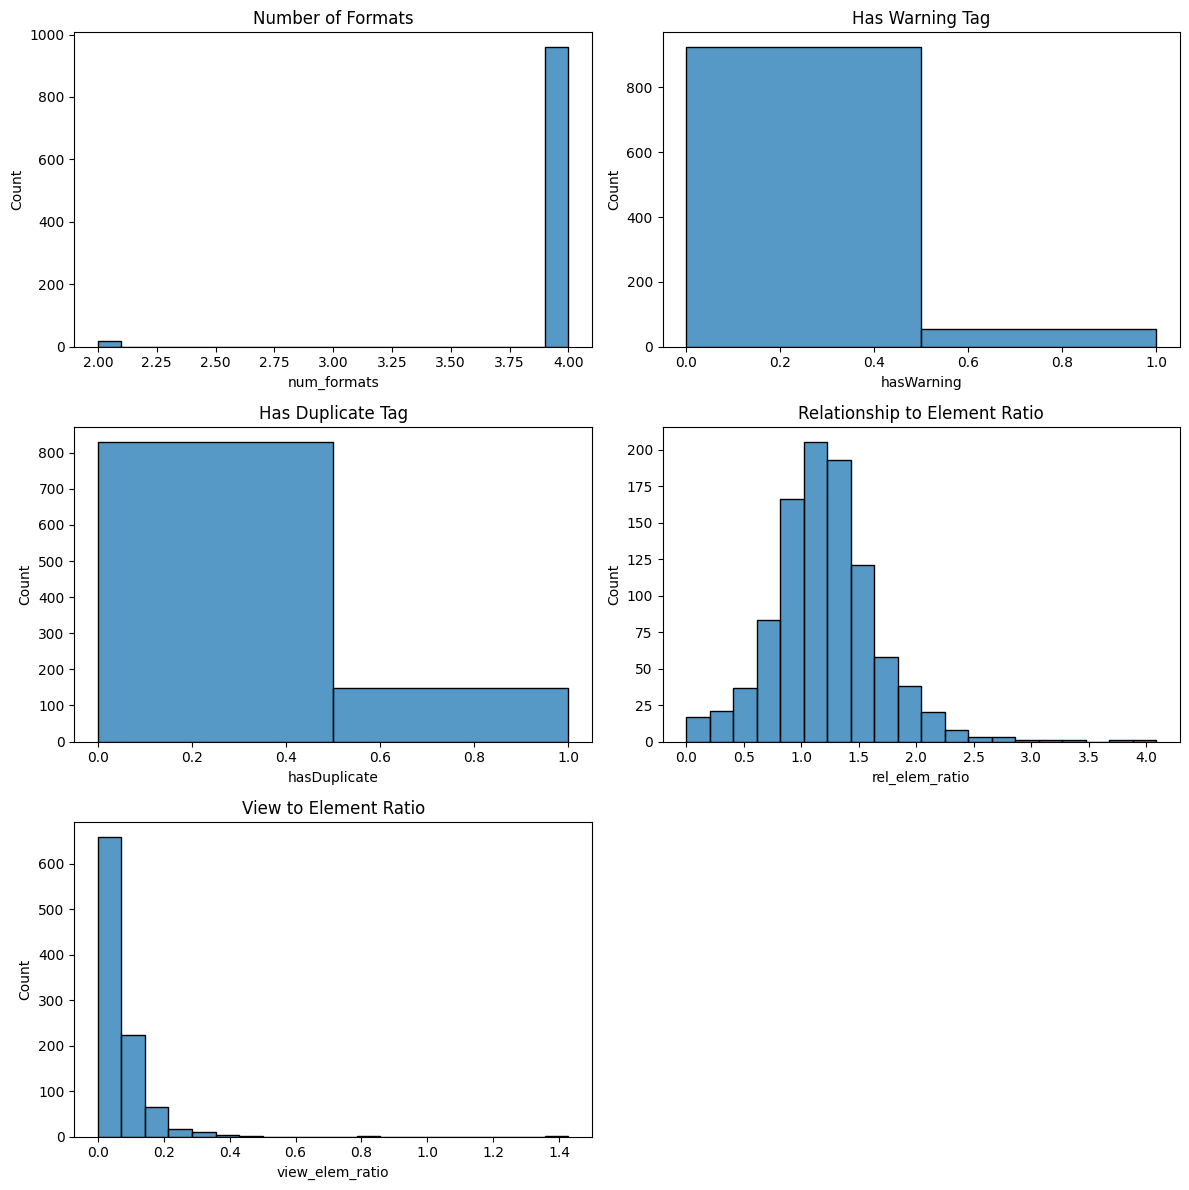

In [15]:
# Create histograms for num_formats, hasWarning, hasDuplicate, rel_elem_ratio, and view_elem_ratio in a 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.histplot(models_df['num_formats'], bins=20, ax=axes[0, 0], kde=False)
sns.histplot(models_df['hasWarning'], bins=2, ax=axes[0, 1], kde=False)
sns.histplot(models_df['hasDuplicate'], bins=2, ax=axes[1, 0], kde=False)
sns.histplot(models_df['rel_elem_ratio'], bins=20, ax=axes[1, 1], kde=False)
sns.histplot(models_df['view_elem_ratio'], bins=20, ax=axes[2, 0], kde=False)
axes[0, 0].set_title('Number of Formats')
axes[0, 1].set_title('Has Warning Tag')
axes[1, 0].set_title('Has Duplicate Tag')
axes[1, 1].set_title('Relationship to Element Ratio')
axes[2, 0].set_title('View to Element Ratio')
axes[2, 1].axis('off')  # Hide the unused subplot
plt.tight_layout()
plt.show()


Histograms created for new numerical features to visualize their distributions. 

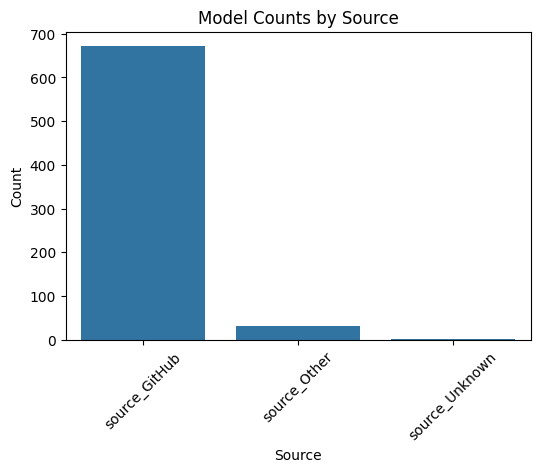

In [16]:
# Create barchart for source column
source_counts = models_df[[col for col in models_df.columns if col.startswith('source_')]].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title('Model Counts by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


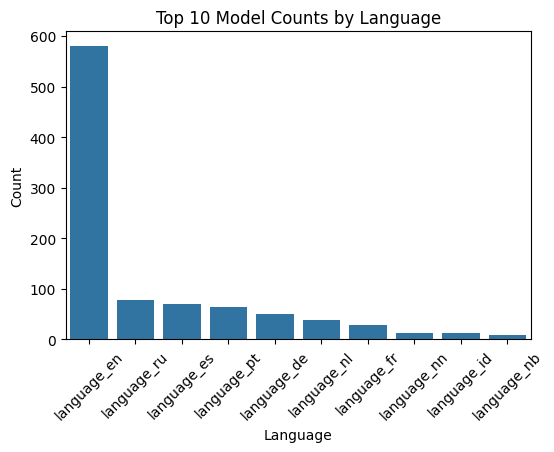

In [17]:
# Create barchart for top ten from languages column
language_counts = models_df[[col for col in models_df.columns if col.startswith('language_')]].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 10 Model Counts by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Bar chart for categorical columns 'source' and 'language' created to visualize their distributions.

In [18]:
# Create a function to classify ARB outcomes based on structure, documentation, quality flags, and model maturity
# Returns 0 = Approved, 1 = Conditionally Approved/Needs Work, 2 = Rejected
def classify_arb_outcome(row):
    if (
        row['hasWarning'] == 1 or 
        row['hasDuplicate'] == 1 or
        row['elementCount'] < 10 or
        row['viewCount'] < 1 or
        row['relationshipCount'] == 0 or
        (row['rel_elem_ratio'] > 5 and row['elementCount'] > 200)
    ):
        return 2

    if (
        row['view_elem_ratio'] < 0.01 or 
        row['rel_elem_ratio'] < 0.1 or
        row['num_formats'] < 2 or
        (10 <= row['elementCount'] < 30) or
        (3 <= row['rel_elem_ratio'] <= 5) or
        (1 <= row['viewCount'] <= 2) or
        row['relationshipCount'] > 2000 or
        (row['relationshipCount'] < 5 and row['elementCount'] > 50)
    ):
        return 1

    return 0


Each model is classified into one of three ARB outcomes based on specific criteria related to its structure, documentation, quality flags, and maturity. 

In [19]:
# Add labels to architecture dataset
models_df['arb_outcome'] = models_df.apply(classify_arb_outcome, axis=1)
models_df['arb_outcome'].value_counts()

arb_outcome
1    525
0    247
2    206
Name: count, dtype: int64

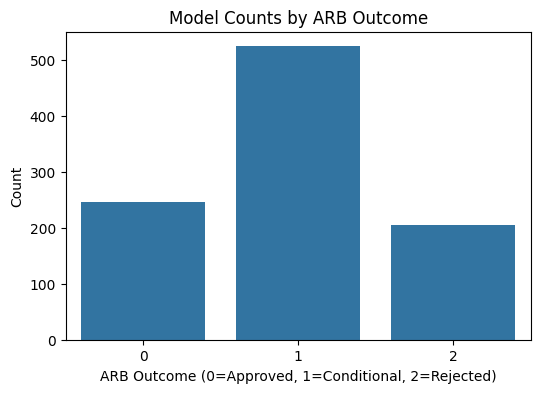

In [20]:
# Create barchart for arb_outcome column
arb_outcome_counts = models_df['arb_outcome'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=arb_outcome_counts.index, y=arb_outcome_counts.values)
plt.title('Model Counts by ARB Outcome')
plt.xlabel('ARB Outcome (0=Approved, 1=Conditional, 2=Rejected)')
plt.ylabel('Count')
plt.show()


Resulting balance of ARB outcomes is appropriate for modeling purposes, with a reasonable distribution across the three classes.

In [21]:
# Save the preprocessed DataFrame to a CSV file
preprocessed_file = os.path.join(ea_modelset_dir, "preprocessed_models.csv")
models_df.to_csv(preprocessed_file, index=False)
print(f"Preprocessed data saved to {preprocessed_file}")

Preprocessed data saved to ..\Data\ea_modelset\eamodelset\dataset\preprocessed_models.csv
